# Assignment2. TwoLayerNN

In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import _pickle as pickle
import time

# set default plot options
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Set up input preprocessing

You need to download the data from the CIFAR-10 website. To do this, simply run following command, and then load dataset.

In [2]:
from utils import get_CIFAR10_data

In [3]:
X_tr, Y_tr, X_te, Y_te, mean_img = get_CIFAR10_data()
print ('Train data shape : %s,  Train labels shape : %s' % (X_tr.shape, Y_tr.shape))
print ('Test data shape : %s,  Test labels shape : %s' % (X_te.shape, Y_te.shape))

Train data shape : (10000, 3072),  Train labels shape : (10000,)
Test data shape : (1000, 3072),  Test labels shape : (1000,)


## Visualize training images

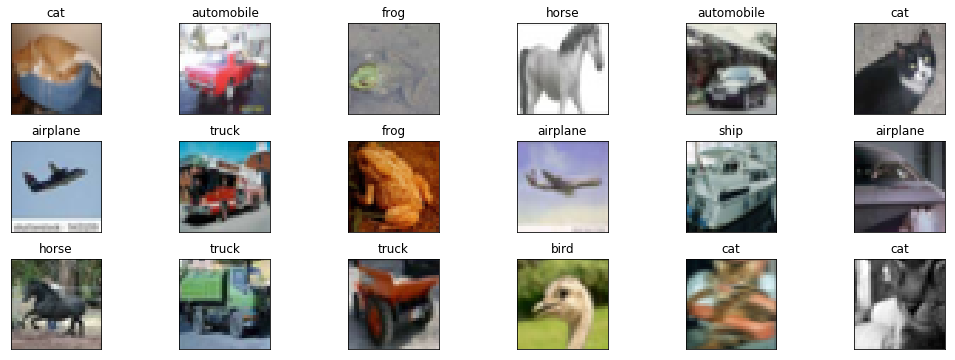

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

images_index = np.int32(np.round(np.random.rand(18,)*10000,0))

fig, axes = plt.subplots(3, 6, figsize=(18, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, idx in zip(axes.flat, images_index):
    img = (X_tr[idx,:3072].reshape(32, 32, 3) + mean_img.reshape(32, 32, 3))
    ax.imshow(img)
    ax.set_title(class_names[Y_tr[idx]])
    

# 1. Softmax function

In [5]:
from YourAnswer import softmax

#### Softmax 구현 검증
#### Softmax implementation testing

In [6]:
temp_x = np.array([[2060,2000,2080]])
print (temp_x.shape)

(1, 3)


In [7]:
softmax_result1 = softmax(temp_x)
print (softmax_result1)

None



    반드시 array([[2.06115362e-09, 1.80485138e-35, 9.99999998e-01]]) 과 같은 결과를 얻어야 함
    The result must be array([[2.06115362e-09, 1.80485138e-35, 9.99999998e-01]]).

In [8]:
print (np.sum(softmax_result1))

None


    반드시 0.9999999999999999 과 같은 결과를 얻어야 함
    The result must be 0.9999999999999999

In [9]:
temp_x = np.array([[2060,2000,2080],[1010,1020,1030]])
print (temp_x.shape)

(2, 3)


In [10]:
softmax_result2 = softmax(temp_x)
print (softmax_result2)

None


    반드시 array([[2.06115362e-09, 1.80485138e-35, 9.99999998e-01],  
                [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]]) 과 같은 결과를 얻어야 함.
    The result must be array([[2.06115362e-09, 1.80485138e-35, 9.99999998e-01],  
                                    [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

In [11]:
print (np.sum(softmax_result2, axis=1))

AxisError: axis 1 is out of bounds for array of dimension 0

    반드시 [1. 1.] 과 같은 결과를 얻어야 함.
    The result must be [1. 1.].

# 2. Cross-Entropy Loss

In [ ]:
from YourAnswer import cross_entropy_loss

#### cross entropy loss 구현 검증
#### cross entropy loss implementation testing

In [ ]:
temp_score0 = np.array([[0.0, 0.0, 0.0]])
temp_target0 = np.array([[0,1,0]])
print (temp_score0.shape)
print (temp_target0.shape)

In [ ]:
temp_weight1 = np.array([[0.1,0.2,0.3],[-0.5,0.3,-0.8]])
temp_weight2 = np.array([[0.9,-0.5,0.3],[0.9,0.6,-0.8]])

weights = {}
weights['W1'] = (temp_weight1)
weights['W2'] = (temp_weight2)

reg_term = 0.001

In [ ]:
cross_entropy_loss(temp_score0, temp_target0, weights, reg_term)

    반드시 20.72530583694641 과 같은 결과를 얻어야 함. (NaN이 나오면 안됨)
    The result must be 20.72530583694641. (NaN must not come out.)

In [ ]:
temp_score1 = np.array([[0.1, 0.3, 0.6]])
temp_target1 = np.array([[0,1,0]])
print (temp_score1.shape)
print (temp_target1.shape)

In [ ]:
cross_entropy_loss(temp_score1, temp_target1 , weights, reg_term)

    반드시 1.2060128009926026 과 같은 결과를 얻어야 함.
    The result must be 1.2060128009926026.

In [ ]:
temp_score2 = np.array([[0.1, 0.3, 0.6],[0.2,0.4,0.4],[0.9,0.05,0.05]])
temp_target2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
print (temp_score2.shape)
print (temp_target2.shape)

In [ ]:
cross_entropy_loss(temp_score2, temp_target2 , weights, 0.001)

    반드시 0.7439146816378243 과 같은 결과를 얻어야 함.
    The result must be 0.7439146816378243.

# 2. Output Layer

In [ ]:
from YourAnswer import OutputLayer

In [ ]:
outputlayer = OutputLayer(weights, reg_term)

In [ ]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_t1 = np.array([[0,1,0]])
print (temp_x1.shape)
print (temp_t1.shape)

In [ ]:
outputlayer.forward(temp_x1, temp_t1)

    반드시 13.097100867144416 값과 같은 결과를 얻어야 함
    The result must be 13.097100867144416.

In [ ]:
outputlayer.backward()

    반드시 array([[ 0.90887517, -0.99999795,  0.09112277]]) 값과 같은 결과를 얻어야 함
    The result must be array([[ 0.90887517, -0.99999795,  0.09112277]]).

In [ ]:
temp_x2 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_t2 = np.array([[0,1,0],[1,0,0],[0,0,1]])
print (temp_x2.shape)
print (temp_t2.shape)

In [ ]:
outputlayer.forward(temp_x2, temp_t2)

    반드시 7.077588386844261 값과 같은 결과를 얻어야 함
    The result must be 7.077588386844261

In [ ]:
outputlayer.backward()

    반드시 array([[ 3.02958391e-01, -3.33332649e-01,  3.03742579e-02],  
                 [-3.32509126e-01,  3.32509088e-01,  3.74189683e-08],  
                 [ 7.26173786e-04,  2.92959414e-01, -2.93685588e-01]]) 값과 같은 결과를 얻어야 함.
    The result must be array([[ 3.02958391e-01, -3.33332649e-01,  3.03742579e-02],  
                             [-3.32509126e-01,  3.32509088e-01,  3.74189683e-08],  
                             [ 7.26173786e-04,  2.92959414e-01, -2.93685588e-01]]).

# 3. ReLU

In [ ]:
from YourAnswer import ReLU

In [ ]:
relu = ReLU()

In [ ]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_x2 = np.array([[-10,1,0]])
print (temp_x1.shape)
print (temp_x2.shape)

In [ ]:
relu.forward(temp_x1)

    반드시 array([[3. , 0. , 0.7]]) 값과 같은 결과를 얻어야 함
    The result must be array([[3. , 0. , 0.7]]).

In [ ]:
relu.backward(temp_x2)

    반드시 array([[-10,   0,   0]]) 값과 같은 결과를 얻어야 함
    The result must be array([[-10,   0,   0]]).

In [ ]:
temp_x3 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_x4 = np.array([[3,5,-10],[5,-4,2],[-3,-5,3]])
print (temp_x3.shape)
print (temp_x4.shape)

In [ ]:
relu.forward(temp_x3)

    반드시 array([[ 3. ,  0. ,  0.7],
                 [ 9. , 15. ,  0. ],
                 [ 0. ,  1. ,  0. ]]) 값과 같은 결과를 얻어야 함
    The result must be array([[ 3. ,  0. ,  0.7],
                             [ 9. , 15. ,  0. ],
                             [ 0. ,  1. ,  0. ]]).

In [ ]:
relu.backward(temp_x4)

    반드시 array([[  3,   0, -10],
                 [  5,  -4,   0],
                 [  0,  -5,   0]]) 값과 같은 결과를 얻어야 함
    The result must be array([[  3,   0, -10],
                             [  5,  -4,   0],
                             [  0,  -5,   0]])

# 4. Sigmoid

In [ ]:
from YourAnswer import Sigmoid

In [ ]:
sigmoid = Sigmoid()

In [ ]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_t1 = np.array([[0,1,0]])
print (temp_x1.shape)
print (temp_t1.shape)

In [ ]:
sigmoid.forward(temp_x1)

    반드시 array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01]]) 값과 같은 결과를 얻어야 함 
    The result must be array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01]]).

In [ ]:
sigmoid.backward(temp_x1)

    반드시 array([[ 0.13552998, -0.00045396,  0.15519901]]) 값과 같은 결과를 얻어야 함
    The result must be array([[ 0.13552998, -0.00045396,  0.15519901]]).

In [ ]:
temp_x2 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_t2 = np.array([[0,1,0],[1,0,0],[0,0,1]])
print (temp_x2.shape)
print (temp_t2.shape)

In [ ]:
sigmoid.forward(temp_x2)

    반드시 array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01],  
                 [9.99876605e-01, 9.99999694e-01, 2.68941421e-01],  
                 [6.69285092e-03, 7.31058579e-01, 2.68941421e-01]]) 값과 같은 결과를 얻어야 함
    The result must be array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01],  
                             [9.99876605e-01, 9.99999694e-01, 2.68941421e-01],  
                             [6.69285092e-03, 7.31058579e-01, 2.68941421e-01]]).             

In [ ]:
sigmoid.backward(temp_x2)

    반드시 array([[ 1.35529979e-01, -4.53958077e-04,  1.55199011e-01],  
                 [ 1.11041415e-03,  4.58853200e-06, -1.96611933e-01],  
                 [-3.32402834e-02,  1.96611933e-01, -1.96611933e-01]]) 값과 같은 결과를 얻어야 함
    The result must be array([[ 1.35529979e-01, -4.53958077e-04,  1.55199011e-01],  
                             [ 1.11041415e-03,  4.58853200e-06, -1.96611933e-01],  
                             [-3.32402834e-02,  1.96611933e-01, -1.96611933e-01]])

# 5. Affine

In [ ]:
from YourAnswer import Affine

In [ ]:
temp_W = np.array([[0.2, -0.3, 0.6], [-0.9, 0.1, -0.4]])
temp_b = np.array([[0.2, -0.3, 0.6]])
print (temp_W.shape)
print (temp_b.shape)

In [ ]:
temp_x = np.array([[0.2, -0.3], [-0.9, 0.1]])
print (temp_x.shape)

In [ ]:
affine = Affine(temp_W, temp_b)

In [ ]:
affine.forward(temp_x)

    반드시 array([[ 0.51, -0.39,  0.84],  
                 [-0.07, -0.02,  0.02]]) 값과 같은 결과를 얻어야 함
    The result must be array([[ 0.51, -0.39,  0.84],  
                             [-0.07, -0.02,  0.02]]).

In [ ]:
temp_t = np.array([[0.1, 0.5, -0.8], [0.4, 0.7, -0.2]])
affine.backward(temp_t)

    반드시 array([[-0.61,  0.28],
                  [-0.25, -0.21]]) 값과 같은 결과를 얻어야 함
    The result must be array([[-0.61,  0.28],
                              [-0.25, -0.21]]).

In [ ]:
affine.dW

    반드시 array([[-0.34, -0.53,  0.02],
                  [ 0.01, -0.08,  0.22]]) 값과 같은 결과를 얻어야 함
    The result must be array([[-0.34, -0.53,  0.02],
                              [ 0.01, -0.08,  0.22]]).

In [ ]:
affine.db

    반드시 array([ 0.5,  1.2, -1. ]) 값과 같은 결과를 얻어야 함
    The result must be array([ 0.5,  1.2, -1. ]).

# 6. TwoLayerNN

### 1) TwoLayerNet 구현하기
### 1) Implementing TwoLayerNet

In [ ]:
from YourAnswer import TwoLayerNet

### 2) Numerical gradient vs Backpropagation

In [ ]:
import time

network = TwoLayerNet(input_size=3072, hidden_size=10, output_size=10, regularization = 0.0001)

x_batch = X_tr[:3]
t_batch = Y_tr[:3]

nb_classes = 10

targets = t_batch.reshape(-1)
t_batch = np.eye(nb_classes)[targets]

start_time = time.time() 
grad_backprop = network.gradient(x_batch, t_batch)
print("[grad_backprop] running time(sec) : " +str(time.time() - start_time))

start_time = time.time() 
grad_numerical = network.numerical_gradient(x_batch, t_batch)
print("[grad_numerical] running time(sec) : "+str(time.time() - start_time))

print ()

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

    Running time은 grad_backprop를 사용했을 때 더 빨라야 함
    Running time must be faster when using grad_backpop.

    Gradient 값의 차이는  
    W1:7.965420308015262e-07  
    b1:3.8788064893238025e-11  
    W2:8.089449817202143e-07  
    b2:1.528478527079713e-09  결과와 유사하게 차이가 적어야 함
    The differences of Gradient values must be small, like
    W1:7.965420308015262e-07  
    b1:3.8788064893238025e-11  
    W2:8.089449817202143e-07  
    b2:1.528478527079713e-09
    

#### Cifar-10 dataset의 Label을 One-hot vector 형태로 바꿔주기
#### Converting the Labels of Cifar-10 dataset to One-hot vector shape

In [ ]:
nb_classes = 10
targets = Y_tr.reshape(-1)
Y_tr_onehot = np.eye(nb_classes)[targets]

targets = Y_te.reshape(-1)
Y_te_onehot = np.eye(nb_classes)[targets]

In [ ]:
input_size_=3072
hidden_size_=1024
output_size_=10
regularization_ = 0.0001

network = TwoLayerNet(input_size=input_size_, hidden_size=hidden_size_, output_size=output_size_, regularization = regularization_)

iters_num = 2000
train_size = X_tr.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list_two = []
train_acc_list_two = []
test_acc_list_two = []

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_tr[batch_mask]
    t_batch = Y_tr_onehot[batch_mask]

    grad = network.gradient(x_batch, t_batch) 

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    for key in ('W1','W2'):
        network.weights[key] = network.params[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list_two.append(loss)    

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_tr, Y_tr_onehot)
        test_acc = network.accuracy(X_te, Y_te_onehot)
        train_acc_list_two.append(train_acc)
        test_acc_list_two.append(test_acc)

        print("Epoch : ",i / iter_per_epoch + 1, "Training acc : ", round(train_acc,2), "Test acc : ", round(test_acc,2))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(train_acc_list_two)
plt.plot(test_acc_list_two)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 7. ThreeLayerNN

    TwoLayerNN 코드를 참고하여 ThreeLayerNN을 구현하고 Training/Test 하시오.
    Implement ThreeLayerNN with referencing TwoLayerNN and perform Training/Test.

In [ ]:
from YourAnswer import ThreeLayerNet

ThreeLayerNet Training / Test

In [ ]:
_input_size=3072
_hidden_size1=1024
_hidden_size2=1024
_output_size=10
_regularization= 0.0001

network = ThreeLayerNet(input_size=_input_size, hidden_size1=_hidden_size1, hidden_size2 = _hidden_size2, output_size = _output_size, regularization = _regularization)

iters_num = 2000
train_size = X_tr.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list_three = []
train_acc_list_three = []
test_acc_list_three = []

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_tr[batch_mask]
    t_batch = Y_tr_onehot[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    #########################################################################################################
    # Gradient를 이용하여 Weight 및 bias를 update 하는 부분을 구현하라.
    # learning_rate 변수를 사용하여 구현할 것
    
    # Implement the Weight and bias updating part using Gradient.
    # Implement using learng_rate variable.
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#

        
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################

    loss = network.loss(x_batch, t_batch)
    train_loss_list_three.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_tr, Y_tr_onehot)
        test_acc = network.accuracy(X_te, Y_te_onehot)
        train_acc_list_three.append(train_acc)
        test_acc_list_three.append(test_acc)

        print("Epoch : ",i / iter_per_epoch + 1, "Training acc : ", round(train_acc,2), "Test acc : ", round(test_acc,2))
        

In [ ]:
plt.plot(train_acc_list_three)
plt.plot(test_acc_list_three)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 8. Cross validation for selecting hyperparameters

    TwoLayerNN에 다양한 Hyperparameter에 대해서 Cross-validation을 진행하고 결과를 확인하시오
    Performing Cross-validation with various Hyperparameters in TwoLayerNN, check the results.

In [ ]:
#########################################################################################################
#------------------------------------------WRITE YOUR CODE----------------------------------------------#
hidden_size_arr= [1024, 2048]
regularization_arr = [0.01, 0.001]
#-----------------------------------------END OF YOUR CODE----------------------------------------------#
#########################################################################################################

learning_rate = 0.1
iters_num = 2000
_input_size= 3072
_output_size= 10

train_size = X_tr.shape[0]
batch_size = 100
learning_rate = 0.1


best_result = np.zeros((3,))

for _hidden_size in (hidden_size_arr):
    for _regularization in (regularization_arr):
        
        print ("Hidden size : " +str(_hidden_size) + " Regularization : " + str(_regularization))

        network = TwoLayerNet(input_size=_input_size, hidden_size=_hidden_size, output_size=_output_size, regularization = _regularization)

        train_size = X_tr.shape[0]
        batch_size = 100

        iter_per_epoch = max(train_size / batch_size, 1)


        for i in range(iters_num):

            batch_mask = np.random.choice(train_size, batch_size)
            x_batch = X_tr[batch_mask]
            t_batch = Y_tr_onehot[batch_mask]

            grad = network.gradient(x_batch, t_batch) 
            
            for key in ('W1', 'b1', 'W2', 'b2'):

                network.params[key] -= learning_rate * grad[key]

            for key in ('W1','W2'):

                network.weights[key] = network.params[key]

            loss = network.loss(x_batch, t_batch)

            if i % iter_per_epoch == 0:
                train_acc = network.accuracy(X_tr, Y_tr_onehot)
                test_acc = network.accuracy(X_te, Y_te_onehot)
                print("Epoch : ",i / iter_per_epoch + 1, "Training acc : ", round(train_acc,2), "Test acc : ", round(test_acc,2))
                if test_acc > best_result[0]:
                    best_result[0] = test_acc
                    best_result[1] = _hidden_size
                    best_result[2] = _regularization

In [ ]:
print ('Best test accruacy : ', best_result[0])
print ('Best hyperparameter, Hidden size : ' + str(best_result[1]) + ' Regularization : ' + str(best_result[2]))